# Review

<font color='grey'><b>Hi, Gaini! My name is Maxim and I will be reviewing your project. I've put all my comments into markdown cells with different background colors.</b></font>

<div class="alert alert-success" role="alert">
  If you did something great I'll be using green color for my comment.
</div>

<div class="alert alert-warning" role="alert">
Yellow cell means it is an optional recommendation -- like when I think something can be improved, or simply offer an advice for your future work.
</div>

<div class="alert alert-danger" role="alert">
  If the topic requires some extra work before I can accept it then the color will be red
</div>

<div class="alert alert-info" role="alert">
  If you'd want to leave your own comment or ask a question or anything: use this cell style, so it would be easier for me to notice in the text  and adress it ;)
</div>

<font color='grey'><b>And, please! Do not delete my comments in further iterations of your project (if there would be any).</b></font>

## Project- Business Analysis

#### Project goal: Optimizing marketing expenses after completing metric calculations and report.

#### Plan:

#### 1. Data preparation

Optimization of memory usage, deleting wrong data
#### 2. Making report and Metric calculation

Showing various graphic results about product, sales and marketing
#### 3. Conclusion

Recommendations on optimized use of investments


## Step 1. Preparation

In [1]:
import pandas as pd

visits = pd.read_csv('/datasets/visits_log_us.csv')
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv',
                  dtype={'Device': 'category'},
                  parse_dates=['Start Ts', 'End Ts'])
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [3]:
visits = visits[visits['End Ts'] > visits['Start Ts']]
visits

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [4]:
orders = pd.read_csv('/datasets/orders_log_us.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [5]:
orders['Buy Ts'] =  pd.to_datetime(orders['Buy Ts'], format="%Y-%m-%d")

In [6]:
costs = pd.read_csv('/datasets/costs_us.csv')
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [7]:
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d")

Three data files were opened and studied. Visits data was optimized and all unnecessary rows were deleted. Datatypes were changed for columns with dates from object to datetime.

<div class="alert alert-success" role="alert">
Very good!
</div>

<div class="alert alert-warning" role="alert"><del>
Also, please provide some short conclusions here, something like we opened those and did that and find this =)
</div>

## Step 2. Metrics and reports

### 1. Product 1. How many people use it every day, week, and month?

In [8]:
visits['date'] = visits['Start Ts'].dt.date
visits['date'] = pd.to_datetime(visits.date)
visits['week'] = visits['date'].dt.week
visits['month'] = visits['date'].dt.month
visits['year'] = visits['date'].dt.year
visits

,Device,End Ts,Source Id,Start Ts,Uid,date,week,month,year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03,35,9,2017
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30,5,1,2018
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,30,7,2017
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,1,2018
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,9,3,2018
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,11,2017


In [9]:
dau = visits.groupby('date').agg({'Uid':'nunique'}).mean()
print('Daily number of users', int(dau))

Daily number of users 817


In [10]:
wau = visits.groupby(['year', 'week']).agg({'Uid': 'nunique'}).mean()
print('Weekly number of users', int(wau))

Weekly number of users 5148


In [11]:
mau = visits.groupby(['year', 'month']).agg({'Uid': 'nunique'}).mean()
print('Monthly number of users', int(mau))

Monthly number of users 20955


In [12]:
dau_desktop = visits[visits['Device']=='desktop'].groupby('date').agg({'Uid':'nunique'}).mean()
print('Daily number of desktop users', int(dau_desktop))
print('Daily number of touch users', int(dau-dau_desktop))

Daily number of desktop users 599
Daily number of touch users 217


In [13]:
wau_desktop = visits[visits['Device']=='desktop'].groupby(['year', 'week']).agg({'Uid':'nunique'}).mean()
print('Weekly number of desktop users', int(wau_desktop))
print('Weekly number of touch users', int(wau-wau_desktop))

Weekly number of desktop users 3756
Weekly number of touch users 1391


In [14]:
mau_desktop = visits[visits['Device']=='desktop'].groupby(['year', 'month']).agg({'Uid':'nunique'}).mean()
print('Monthly number of desktop users', int(mau_desktop))
print('Monthly number of touch users', int(mau-mau_desktop))

Monthly number of desktop users 15239
Monthly number of touch users 5715


In [15]:
visits['month_upd'] = visits['date'].astype('datetime64[M]')

<div class="alert alert-success" role="alert">
The numbers seem to be correct =)
</div>

Text(0, 0.5, 'Number of visits')

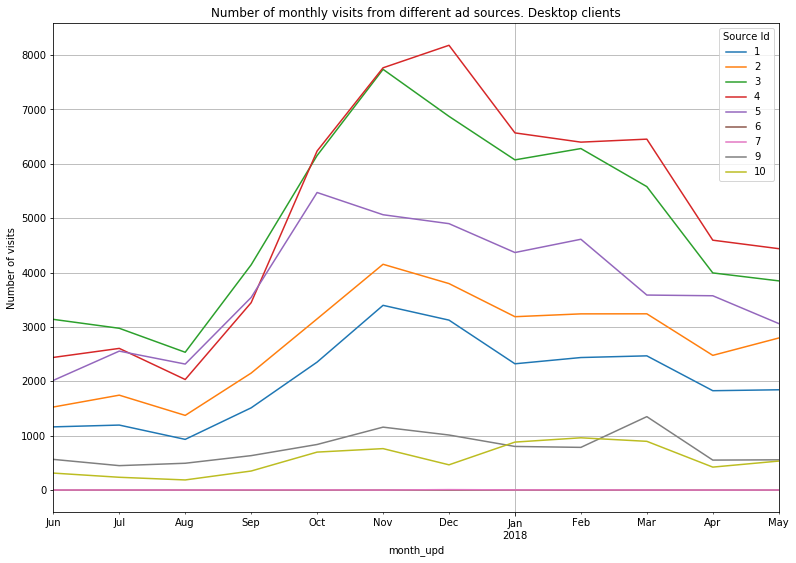

In [16]:
visits_pivot_desktop = visits.query('Device=="desktop"').pivot_table(index='month_upd', columns=['Source Id'], values='Uid', aggfunc='count')
visits_pivot_desktop.fillna(0).plot(figsize=(13, 9), grid=True, kind='line')
from matplotlib import pyplot as plt
plt.title('Number of monthly visits from different ad sources. Desktop clients')
plt.ylabel('Number of visits')

The graph above shows the monthly number of visits from desktop devices for each ad sources. The 3rd and 4th ad sources are the leaders, the graphs are synchronized, i.e they rise and decline at roughly the same time throughout the year. The 4th ad source reaches the peak of more than 8000 visitors in December, which the highest number of visitors. Probably due to winter holidays. 

<div class="alert alert-warning" role="alert"><del>
Technically there's nothing wrong with this graph, but I think a simple lineplot would be more informative here. Alternatively you can use heatmap here, as a mean to plot a 3-dimensional data.
</div>

Text(0, 0.5, 'Number of visits')

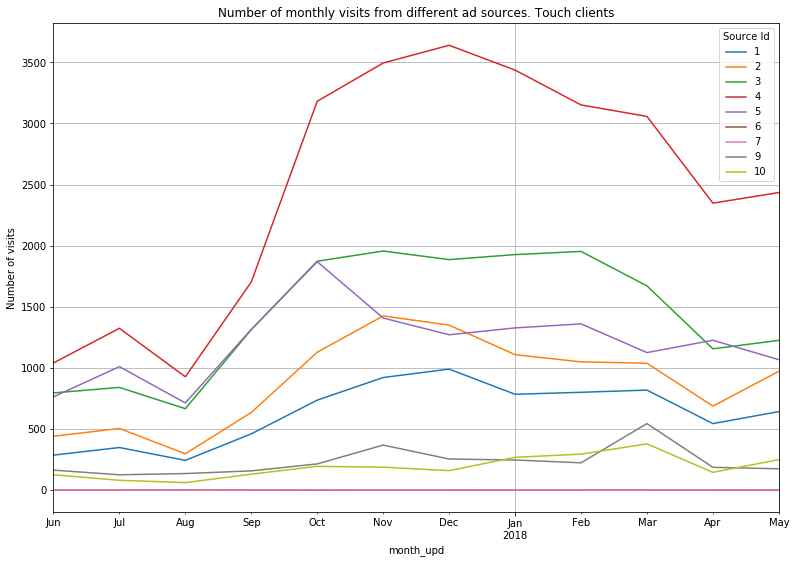

In [17]:
visits_pivot_desktop = visits.query('Device=="touch"').pivot_table(index='month_upd', columns=['Source Id'], values='Uid', aggfunc='count')
visits_pivot_desktop.fillna(0).plot(figsize=(13, 9), grid=True, kind='line')
plt.title('Number of monthly visits from different ad sources. Touch clients')
plt.ylabel('Number of visits')

The graph above shows the distribution of visits from different ad sources made from touch devices. The graphs for the 3rd and 5th sources are almost identical till October, after that visits from the 5th ad source drastically decline. The number of visits from these ad sources becomes roughly the same in April following opposite directions afterwards. 

The analysis has shown that the majority of visitors come from desktop devices. The monthly number of desktop visitors is 3 times higher. The graphs which represent monthly distribution of visits are mostly synchronized, the 3rd and 4th ad sources have the highest traffic. 

<div class="alert alert-warning" role="alert"><del>
Also it seems rather weird to plot identical graphs but one per each year. Why not just merge those two samples into one?
</div>

<div class="alert alert-danger" role="alert"><del>
This graph creates a wrong impression. It looks like the number of visits was initially very high, then dropped to aal time low, then suddenly surged to an all-time high. You could instead display the time interval, rather than absolute month value. ANd in this case we would see a vastly different picture and make a different conclusion.
<br>
<br>
Please, adress this issue wherever it is possible, not just this single occasion.
</div>

<div class="alert alert-success" role="alert">
Excellent! =)
</div>

### 2. How many sessions are there per day? (One user might have more than one session.)

Text(0, 0.5, 'Number of visits')

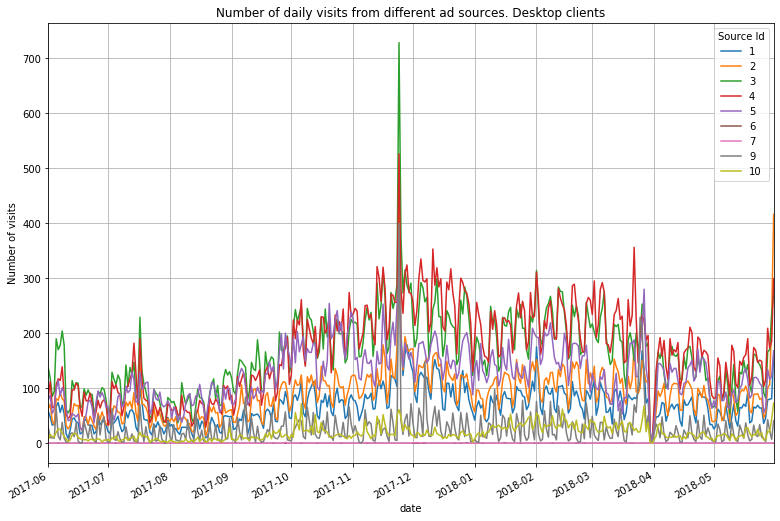

In [18]:
sessions_per_day_desk = visits[visits['Device']=='desktop'].pivot_table(index='date', columns='Source Id', values='Uid', aggfunc='count')
sessions_per_day_desk.fillna(0).plot(figsize=(13, 9), grid=True)
plt.title('Number of daily visits from different ad sources. Desktop clients')
plt.ylabel('Number of visits')

The graph above represents the number of daily visits from different ad sources made by desktop clients. Visits peaked in December, probably before the New year celebration. In general all the graphs decline and rise every week, i.e each month has around 4 peaks on average. Perhaps the number of visits increases by the end of each week, declines on Monday and so on. 

Text(0, 0.5, 'Number of visits')

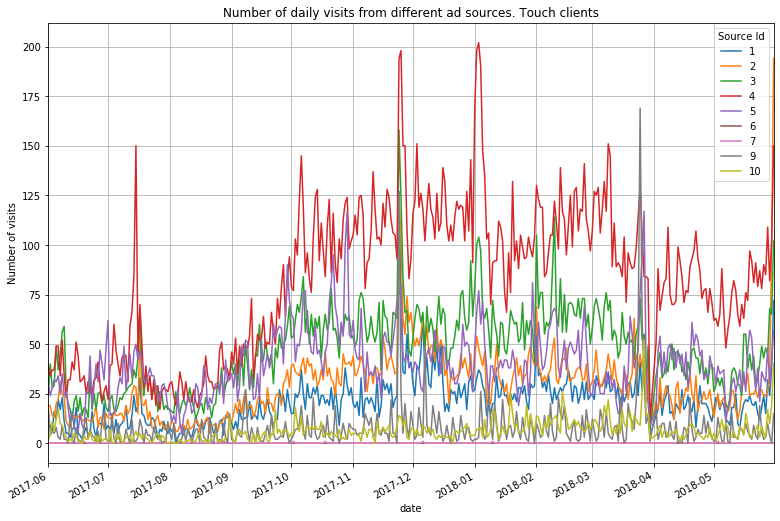

In [19]:
sessions_per_day_touch = visits[visits['Device']=='touch'].pivot_table(index='date', columns='Source Id', values='Uid', aggfunc='count')
sessions_per_day_touch.fillna(0).plot(figsize=(13, 9), grid=True)
plt.title('Number of daily visits from different ad sources. Touch clients')
plt.ylabel('Number of visits')

This graph shows the number of daily visits from different ad sources made by touch users. As can be seen this graph correlates with the monthly visits graph. The absolute traffic leader is the 4th ad source. Compared to other ad source graphs, the 4th ad source has several peaks in July, December and January. These peaks probably are related to holidays. 

<div class="alert alert-warning" role="alert"><del>
Not bad, though I kinda expected to see a graph here =)
</div>

<div class="alert alert-danger" role="alert"><del>
Ok, that is very nice, but some commentary on that would be really cool. Can you see any anomalies here? What could they mean?
</div>
<div class="alert alert-success" role="alert">
That will do =)
</div>

### 3. What is the length of each session?

Text(0, 0.5, 'Number of sessions')

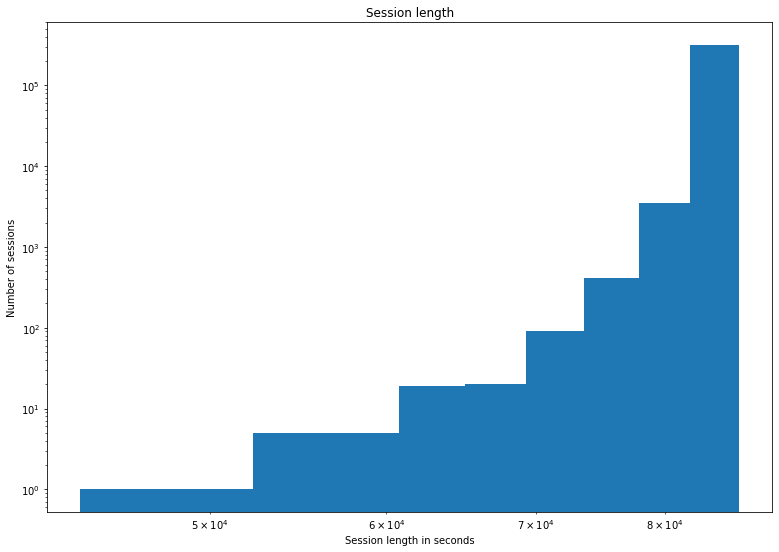

In [20]:
visits['session_length'] = (visits['Start Ts'] - visits['End Ts']).dt.seconds
visits['session_length'].plot(kind='hist', loglog=True, figsize=(13, 9))
plt.title('Session length')
plt.xlabel('Session length in seconds')
plt.ylabel('Number of sessions')

In [21]:
average_session_length = visits['session_length'].mode()
print('Session length in seconds', int(average_session_length))

Session length in seconds 86340


<div class="alert alert-warning" role="alert"><del>
See if logscale would make this look any better =)
</div>
<div class="alert alert-success" role="alert">
Very nice!
</div>

### 4. How often do users come back?

In [22]:
number_of_orders_per_user = orders.pivot_table(index='Uid', values='Buy Ts', aggfunc='count')
user_returned = number_of_orders_per_user[number_of_orders_per_user['Buy Ts'] >= 2]
user_return_rate = user_returned.count() / number_of_orders_per_user.count()
print('How often do users come back or user return rate:', float(user_return_rate))

How often do users come back or user return rate: 0.17227500479150124


Text(0, 0.5, 'Number of clients')

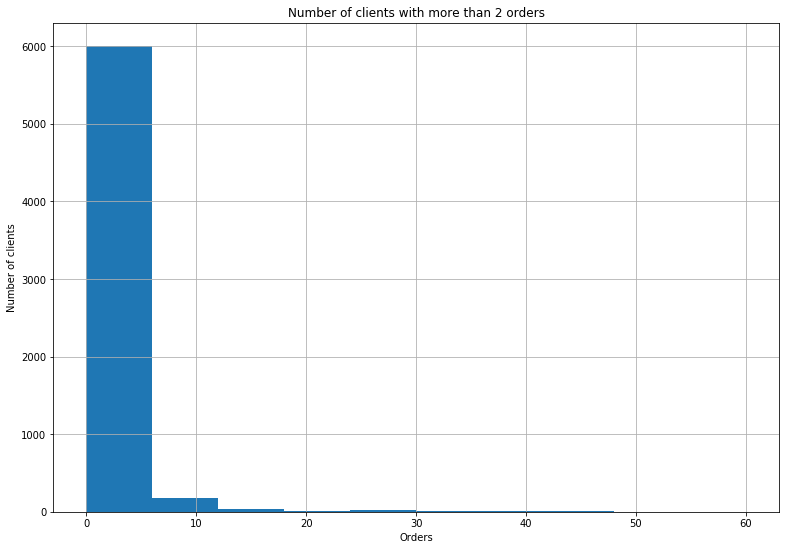

In [23]:
user_returned.hist(bins=10, range=(0,60), figsize=(13, 9))
plt.title('Number of clients with more than 2 orders')
plt.xlabel('Orders')
plt.ylabel('Number of clients')

The average session length is abnormally high, probably because most users use desktops and leave sessions unclosed. The graph above shows clients who had at least 2 orders (they are in the category of returned clients). As seen from the graph most clients do not return more than 5 times. Graphs of the monthly number of visits (both touch and desktop) showed a steady increase in the number of visits which reached its peak by the end of 2017. After that the number of monthly visits was decreasing. 

<div class="alert alert-success" role="alert">
Excellent!
</div>

### Sales

In [24]:
first_order_dates = orders.groupby('Uid')['Buy Ts'].min()
first_order_dates.name = 'first_order_date'

Text(0, 0.5, 'Number of first orders')

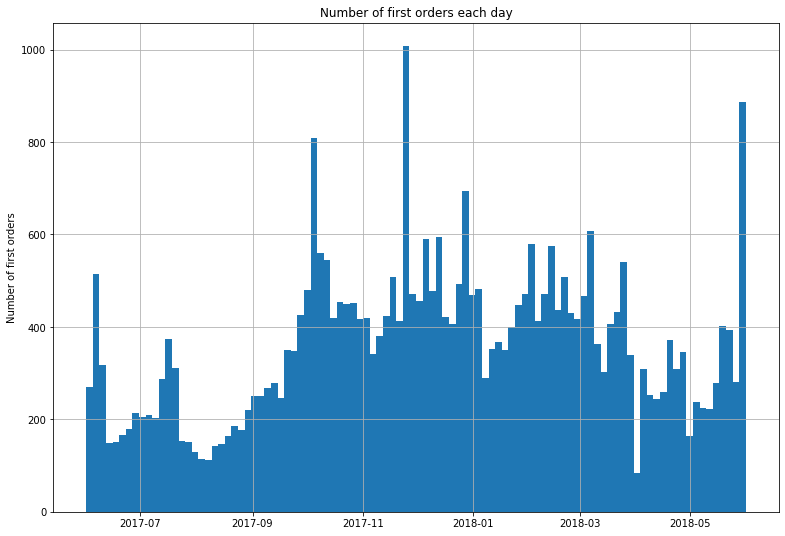

In [25]:
first_order_dates.hist(figsize=(13, 9), bins=100)
plt.title('Number of first orders each day')
plt.ylabel('Number of first orders')

  
<div class="alert alert-success" role="alert">
Very good graph!
</div>
    
<div class="alert alert-danger" role="alert"><del>
To be fair, the question "When do people start buying" is somewhat vaguely formulated, but I think it means that you need to calculate the time between the "first visit" and the "first_order_date". And output it either as average/median, or as a histogram (as I suggested above).
</div>
   

<div class="alert alert-info" role="alert">
    I answered the 1st question (When do people start buying?) at the end of this section. 
</div>

<div class="alert alert-success" role="alert">
Well, if I missed it -- sorry then =)
</div>

###  2. How many orders do they make during a given period of time? 3. What is the average purchase size? 4. How much money do they bring? (LTV)

In [26]:
orders=orders.merge(first_order_dates, on='Uid', how='inner')
orders.head()

,Buy Ts,Revenue,Uid,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00


In [27]:
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders = orders.merge(visits, on='Uid', how='left')
orders = orders[(orders['Buy Ts'] >= orders['Start Ts']) & (orders['End Ts'] >= orders['Buy Ts'])]

In [28]:
first_orders = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')

In [29]:
import numpy as np

cohorts = orders.groupby(['first_order_month', 'order_month']).agg({'Buy Ts':'nunique', 'Uid':'nunique', 'Revenue': 'sum'}).reset_index()
 
cohorts['cohort_lifetime'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1,'M')).round()
cohorts.columns = ['first_order_month', 'order_month', 'number_of_orders', 'number_of_clients', 'revenue', 'cohort_lifetime']
 
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)
 
cohorts_report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')
cohorts_report['rev_per_buyer'] = cohorts_report['revenue'] / cohorts_report['n_buyers']
 
lifetime_pivot = cohorts_report.pivot_table(
    index='first_order_month', 
    columns='cohort_lifetime', 
    values='rev_per_buyer', 
    aggfunc='sum'
).cumsum(axis=1)

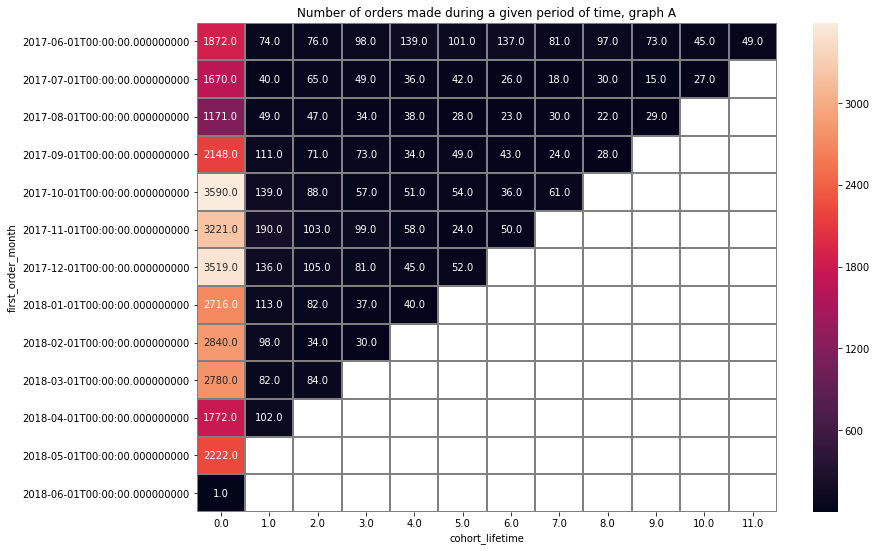

In [30]:
import numpy as np
import seaborn as sns
orders_pivot = cohorts_report.pivot_table(index='first_order_month',columns='cohort_lifetime',values='number_of_orders',aggfunc='sum')
plt.figure(figsize=(13, 9))
plt.title('Number of orders made during a given period of time, graph A')
sns.heatmap(orders_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray')

Cohort_lifetime==0 represents the number of orders each cohort made during their very first month. Analysis needs this information to see what portion of clients in the cohort are still active during the next lifetime month. As seen from the heatmap members of each cohort did not stay loyal since the number of orders drastically decreased after cohort_lifetime==0.

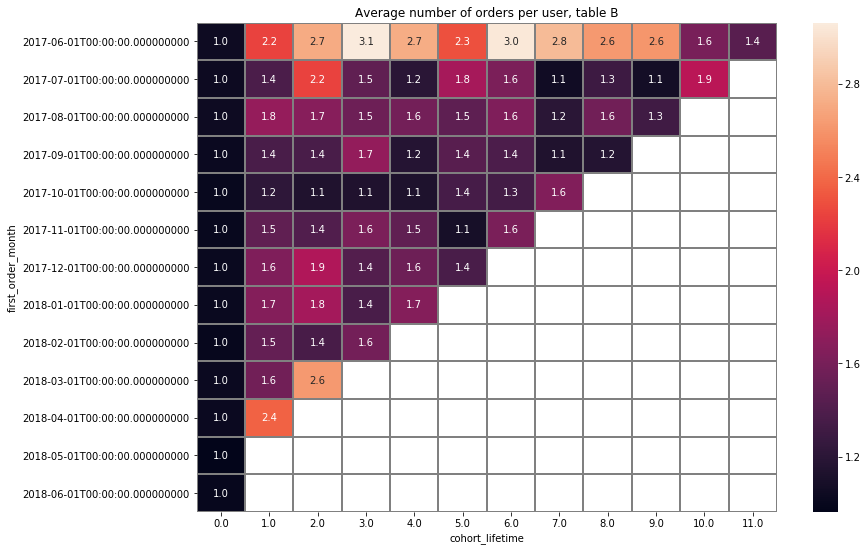

In [31]:
cohorts_report['orders_per_user'] = cohorts_report['number_of_orders'] / cohorts_report['number_of_clients']
average_orders_pivot = cohorts_report.pivot_table(index='first_order_month',columns='cohort_lifetime',values='orders_per_user',aggfunc='sum')
plt.figure(figsize=(13, 9))
plt.title('Average number of orders per user, table B')
sns.heatmap(average_orders_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray')

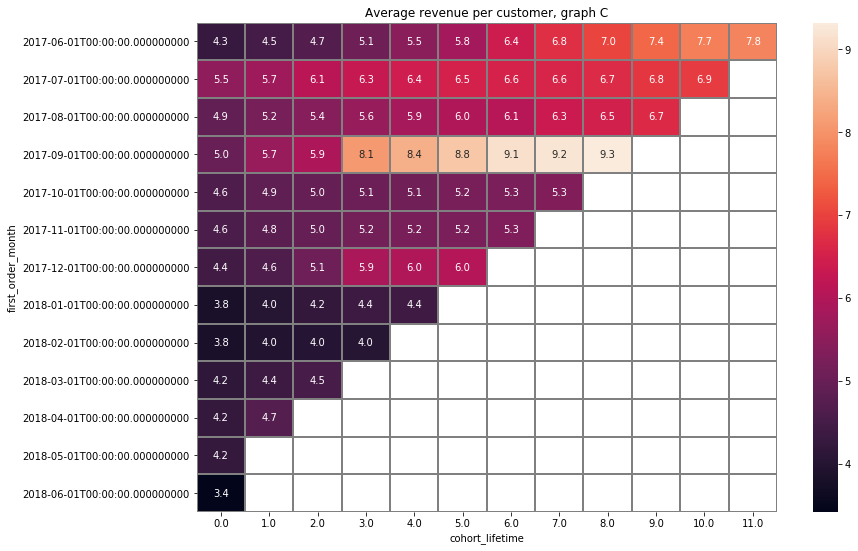

In [32]:
plt.figure(figsize=(13, 9))
plt.title('Average revenue per customer, graph C')
sns.heatmap(lifetime_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray')

Heatmaps showed that the largest amount of orders were made during the first cohort lifetime and it is true for each cohort. Thus the revenue of the first lifetime is high. But the average number of orders during the first cohort lifetime is only 1 order. Though, the initial cohort size was very large most of cohort members made only one order on average, meaning that most of them did not return. The clients who stayed loyal, however, made more orders on average. In general, each cohort had larger average number of orders by the end of the final lifetime compared to the initial one. The values of average revenue per customers were increasing each month for each cohort. The first cohort was the most loyal and willing to make more orders and thus bring more revenue. 

<div class="alert alert-warning" role="alert"><del>
In general, this is correct, but could you please explain what those values for "cohort_lifetime == 0" mean and why are they needed in this plot in the first place?
</div>

<div class="alert alert-success" role="alert">
This looks quite decent, I like that =)
</div>

<div class="alert alert-warning" role="alert"><del>
And don't forget conclusions, of course =)
</div>
<div class="alert alert-success" role="alert">
Ok, that will do! =)
</div>

### 1. When do people start buying?

In [33]:
first_visit_dates = orders.groupby('Uid')['Start Ts'].min()
first_visit_dates.name = 'first_visit_date'

Text(0, 0.5, 'Number of sessions')

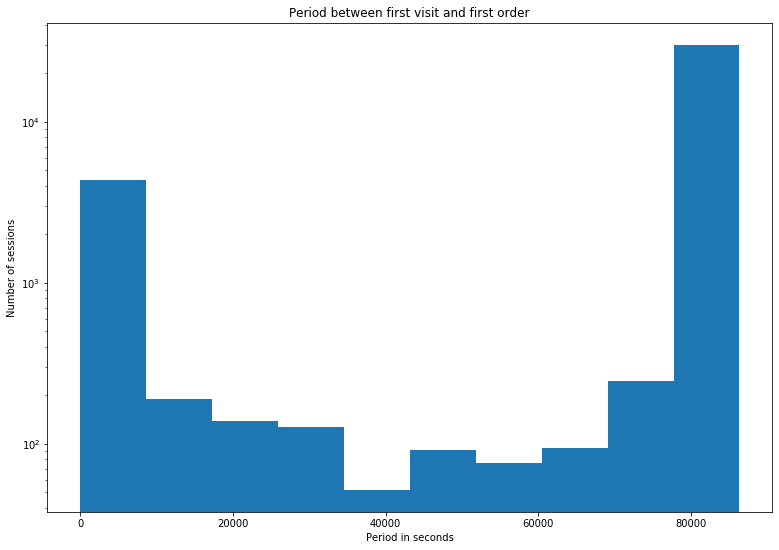

In [34]:
start_buy = orders.merge(first_visit_dates, on='Uid', how='left')
start_buy['visit_order_period'] = (start_buy['first_visit_date'] - start_buy['first_order_date']).dt.seconds
start_buy['visit_order_period'].plot(kind='hist', logy=True, figsize=(13, 9))
plt.title('Period between first visit and first order')
plt.xlabel('Period in seconds')
plt.ylabel('Number of sessions')

The histogtam given above shows how much time it takes for clients to make a first order since the first visit date. As the graph shows most peope either buy something on their first visit or wait one day (>80000 sec.) and then make orders.

One important point to mention is that the original number of clients in every cohort decreases a lot. This can be seen from graph A. Every cohort makes significantly more orders during the first lifetime. Thus the revenue is much higher as well, but it is not the case for the average number of orders. Cohorts have more clients initially but they make only 1 order on average. it means that most customers do not return after making only one order. Cohorts make less orders as the they approach later lifetime periods, but those who stay loyal buy more products on average. 

### 3 Marketing 1. How much money was spent? Overall/per source/over time

In [35]:
money_spent_overall =  costs['costs'].sum()
print('Money spent overall', float(money_spent_overall))

Money spent overall 329131.62


In [36]:
money_spent_per_source = costs.pivot_table(index='dt', columns='source_id', values='costs', aggfunc='sum').reset_index(drop=True)

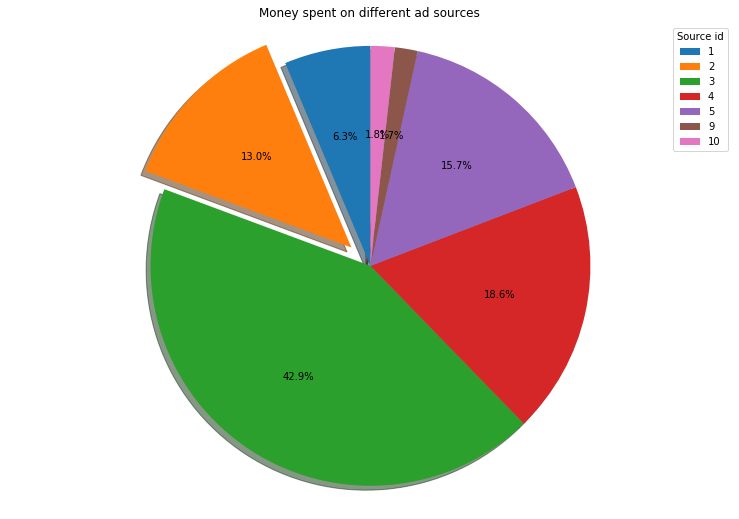

In [37]:
import matplotlib.pyplot as plt

money_sum = money_spent_per_source[[1, 2, 3, 4, 5, 9, 10]].sum()
explode = (0, 0.12, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(13, 9))
ax1.pie(money_sum, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title ='Source id', labels=[1, 2, 3, 4, 5, 9, 10])
plt.title('Money spent on different ad sources')
plt.show()

<div class="alert alert-success" role="alert">
This seems believable. The percentage count makes it very informative =)
</div>

<div class="alert alert-warning" role="alert">
Though I'm not sure that piechart is the best illustration method here, since the amount of sectors is quite large.  I would rather recommend to simply go with standard barplots (keep the percentages though).
</div>

In [38]:
revenue_by_source = orders.pivot_table(index='Source Id', values='Revenue', aggfunc='sum').sort_values(by='Revenue', ascending=False)
revenue_by_source

,Revenue
Source Id,
4.0,34375.06
5.0,33274.02
2.0,33100.05
3.0,30047.33
1.0,28185.42
10.0,3074.98
9.0,2756.29
7.0,1.22


The graphs given above illustrate money expenditure on different ad sources and the revenue they bring. As can be seen the company spends nearly a half of its marketing budget on the 3rd source. But it is less profitable than the 4th, 5th, 2nd ad sources, though  company invests much less money on each of them. The 1st ad source brings nearly as much money as the 3rd one while being invested only a 1/7 of the 3rd source's marketing budget. 

In [39]:
costs['month'] = costs['dt'].dt.month
costs['year'] = costs['dt'].dt.year
costs['month_upd'] = costs['dt'].astype('datetime64[M]')

Text(0, 0.5, 'Money')

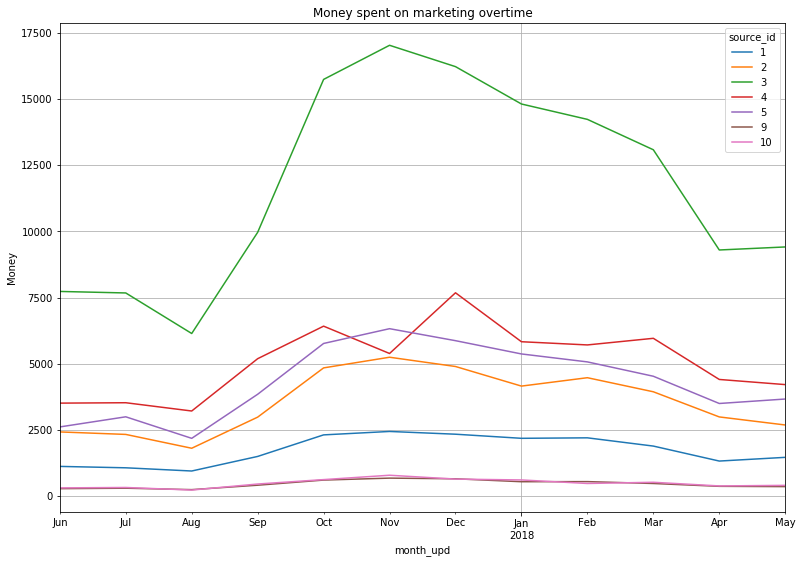

In [40]:
money_spent_overtime = costs.pivot_table(index='month_upd', columns='source_id', values='costs', aggfunc='sum')
money_spent_overtime.plot(figsize=(13, 9), grid=True)
plt.title('Money spent on marketing overtime')
plt.ylabel('Money')

The graph shows how much money was spent on each ad source monthly (overtime), as seen from the graph the company invested significant amount of finances on the 3rd source. In general the graphs are synchronized with some exceptions for the 4th ad source. The investments for this source declined in November while increasing for the other ad sources. In December however the company focused on investing in the 4th ad source more. 

The leading ad sourcres 3rd, 4th, 5th, 2nd and 1st brought nearly the same amount of revenue. But the marketing investment expenditure on all of them is uneven. The 4th, 5th, 2nd and 1st sources' investments all summed up almost equal the money invested on the 3rd source alone. The company should probably pay more attention to the 1st source since it required less investments but brought almost the same revenue as the 3rd ad source.  

<div class="alert alert-info" role="alert">
  I entirely changed everyting in the next two steps, I hope this is my last time submitting this project T_T
    
   :D
</div>

<div class="alert alert-success" role="alert">
Oh wow!!! I can see that! =)
</div>

### 2. How much did customer acquisition from each of the sources cost?

In [41]:
orders['first_order_date_only'] = orders['first_order_date'].astype('datetime64[D]')

In [42]:
buyers_revenue_daily = orders.groupby(['Source Id', 'first_order_date_only']).agg({'Uid': 'count', 'Revenue': 'sum'}).reset_index()
buyers_revenue_daily.rename(columns={'Source Id': 'source_id', 'Uid': 'n_buyers', 'Revenue': 'revenue', 'first_order_date_only': 'dt'}, inplace=True)

Text(0.5, 0, 'Month')

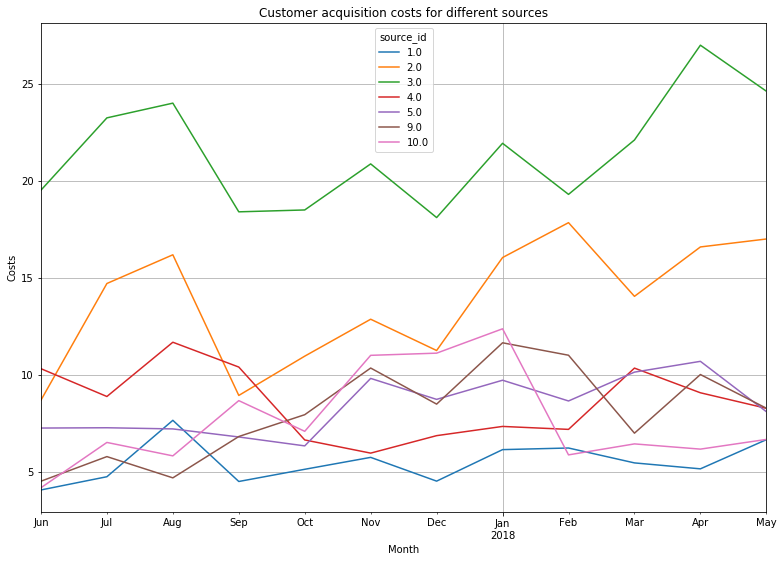

In [43]:
cac_report = pd.merge(buyers_revenue_daily, costs, on=['source_id', 'dt'])
cac_report['cac'] = cac_report['costs'] / cac_report['n_buyers']
cac_report.pivot_table(index='month_upd', columns='source_id', values='cac', aggfunc='mean').plot(figsize=(13, 9), grid=True)
plt.title('Customer acquisition costs for different sources')
plt.ylabel('Costs')
plt.xlabel('Month')

It turns out the ad source the company invested in the most had the most expensive customer acquisition costs. Previous analysis have shown that the 3rd ad source had the largest traffic each month, but only a small fraction of visitors actually bought something. Surprisingly, 1st ad source was the cheapest. CAC decreased almost for each ad source during December, again probably due to the holiday season. 

### 3. How worthwhile were the investments? (ROI)

In [44]:
orders.rename(columns={'first_order_date_only': 'dt', 'Source Id': 'source_id'}, inplace=True)
orders.head()

,Buy Ts,Revenue,Uid,first_order_date,order_month,first_order_month,Device,End Ts,source_id,Start Ts,date,week,month,year,month_upd,session_length,dt
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:11:00,1.0,2017-06-01 00:09:00,2017-06-01,22.0,6.0,2017.0,2017-06-01,86280.0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:25:00,2.0,2017-06-01 00:14:00,2017-06-01,22.0,6.0,2017.0,2017-06-01,85740.0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:34:00,2.0,2017-06-01 00:25:00,2017-06-01,22.0,6.0,2017.0,2017-06-01,85860.0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01,2017-06-01,desktop,2017-06-01 00:33:00,2.0,2017-06-01 00:14:00,2017-06-01,22.0,6.0,2017.0,2017-06-01,85260.0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01,2017-06-01,desktop,2017-06-01 07:59:00,3.0,2017-06-01 07:31:00,2017-06-01,22.0,6.0,2017.0,2017-06-01,84720.0,2017-06-01


In [45]:
costs_orders = pd.merge(orders, costs, on=['dt', 'source_id'])
costs_orders = costs_orders[['Buy Ts', 'Revenue', 'Uid', 'first_order_date', 'order_month',
       'first_order_month', 'Device', 'source_id', 'costs', 'dt' ]]
costs_orders.head()

,Buy Ts,Revenue,Uid,first_order_date,order_month,first_order_month,Device,source_id,costs,dt
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01,2017-06-01,desktop,1.0,75.2,2017-06-01
1,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01 09:22:00,2017-06-01,2017-06-01,desktop,1.0,75.2,2017-06-01
2,2017-08-31 14:21:00,1.83,3644482766749211722,2017-06-01 09:22:00,2017-08-01,2017-06-01,desktop,1.0,75.2,2017-06-01
3,2017-09-05 15:52:00,0.49,3644482766749211722,2017-06-01 09:22:00,2017-09-01,2017-06-01,desktop,1.0,75.2,2017-06-01
4,2017-09-15 19:28:00,3.05,3644482766749211722,2017-06-01 09:22:00,2017-09-01,2017-06-01,desktop,1.0,75.2,2017-06-01


In [46]:
def unit_econ_per_source(ad):
    cohorts = costs_orders[costs_orders['source_id']==ad].groupby(['first_order_month', 'order_month']).agg({'Revenue': 'sum', 'costs': 'sum'}).reset_index()
 
    cohorts['cohort_lifetime'] = ((cohorts['order_month'] - cohorts['first_order_month']) / np.timedelta64(1,'M')).round()
    cohorts.columns = ['first_order_month', 'order_month', 'revenue', 'costs', 'cohort_lifetime']
 
    cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
    cohort_sizes.rename(columns={'uid': 'n_buyers'}, inplace=True)
 
    cohorts_report = pd.merge(cohort_sizes, cohorts, on = 'first_order_month')
    cohorts_report['rev_per_buyer'] = cohorts_report['revenue'] / cohorts_report['n_buyers']
    cohorts_report['cac'] = cohorts_report['costs'] / cohorts_report['n_buyers']
    cohorts_report['roi'] = cohorts_report['rev_per_buyer'] / cohorts_report['cac']

    pivot_table = cohorts_report.pivot_table(
        index='first_order_month', 
        columns='cohort_lifetime', 
        values='roi', 
        aggfunc='sum'
    ).cumsum(axis=1).round(2)

    return pivot_table
    

#### The clients were divided into cohorts according to the ad source they came from. Below are ROI results per cohort, per ad source.

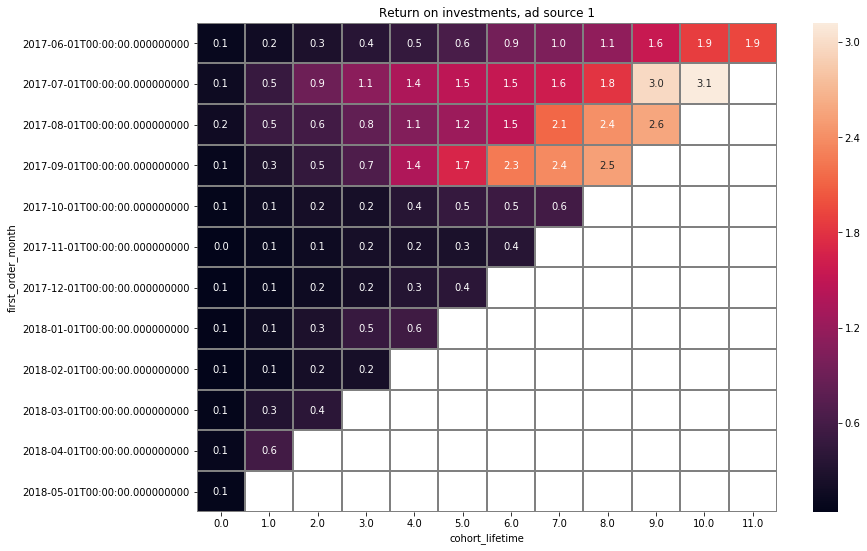

In [47]:
plt.figure(figsize=(13, 9))
plt.title('Return on investments, ad source 1')
sns.heatmap(unit_econ_per_source(1), annot=True, fmt='.1f', linewidths=1, linecolor='gray')

The 1st ad source cohorts of July, August and September covered the marketing expenses after 5 months each. It took 9 months for the 1st cohort. Other cohorts have not covered the expenses yet. It will probably take longer of the orhers to cover up the marketing expenses. In general, the 1st ad source have shown positive results.

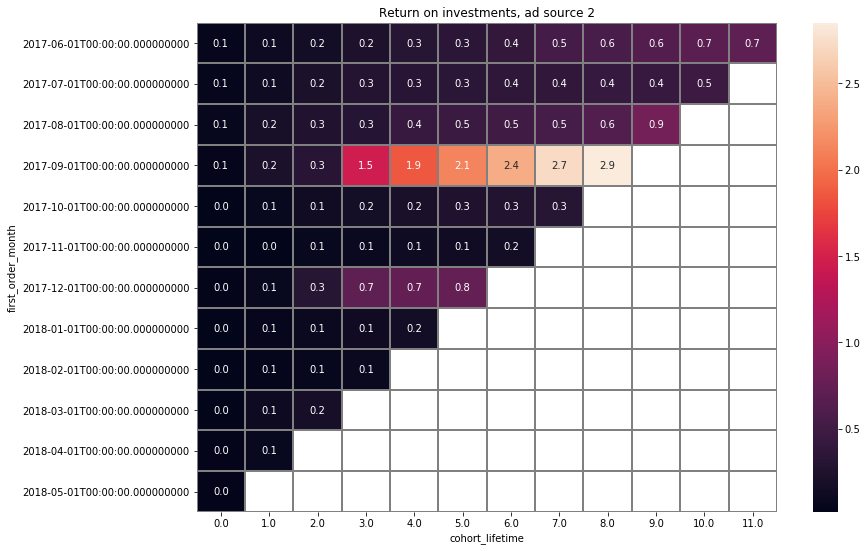

In [48]:
plt.figure(figsize=(13, 9))
plt.title('Return on investments, ad source 2')
sns.heatmap(unit_econ_per_source(2), annot=True, fmt='.1f', linewidths=1, linecolor='gray')

The company suffered losses during the first lifetimes of each cohort. And none of the cohorts, except for the September cohort has covered the marketing expenses. September cohort showed remarkable results, it brought profit after only the 4th month, but it is rather an exception. The average expense coverage period is anyway quite long, probably around 1 year.

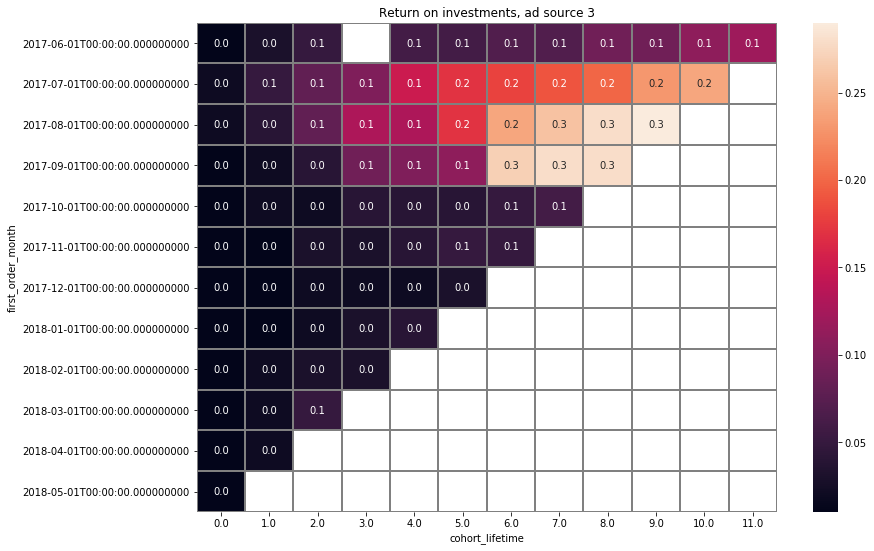

In [49]:
plt.figure(figsize=(13, 9))
plt.title('Return on investments, ad source 3')
sns.heatmap(unit_econ_per_source(3), annot=True, fmt='.1f', linewidths=1, linecolor='gray')

The 3rd ad source showed the most surprising results. None of the cohorts is even close enough to cover the expenses. 

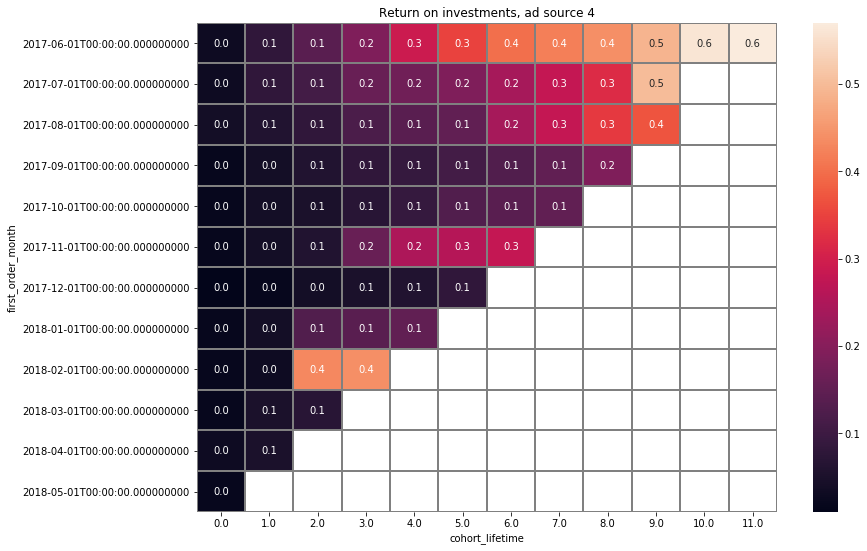

In [50]:
plt.figure(figsize=(13, 9))
plt.title('Return on investments, ad source 4')
sns.heatmap(unit_econ_per_source(4), annot=True, fmt='.1f', linewidths=1, linecolor='gray')

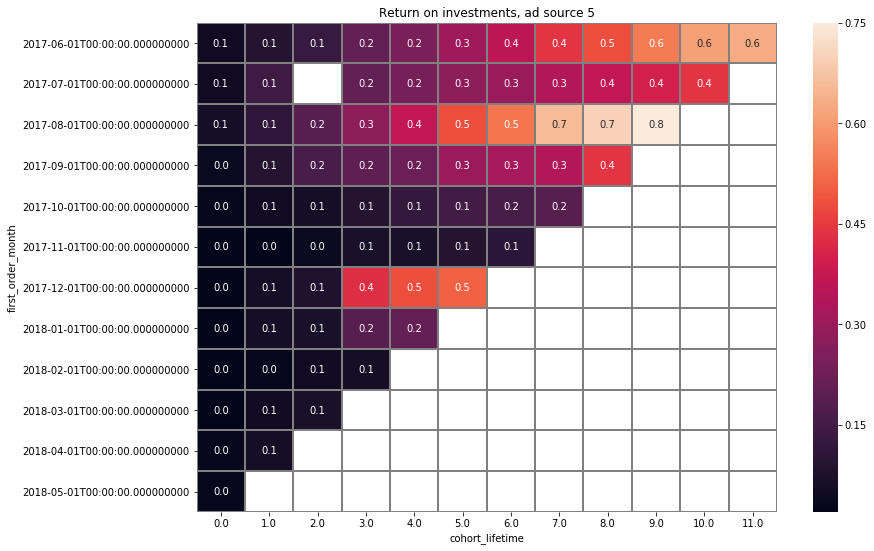

In [51]:
plt.figure(figsize=(13, 9))
plt.title('Return on investments, ad source 5')
sns.heatmap(unit_econ_per_source(5), annot=True, fmt='.1f', linewidths=1, linecolor='gray')

The 4th and 5th ad sources showed quite similar results, it probably will take another year for the cohorts from these sources to cover the expenses and bring any profit. 

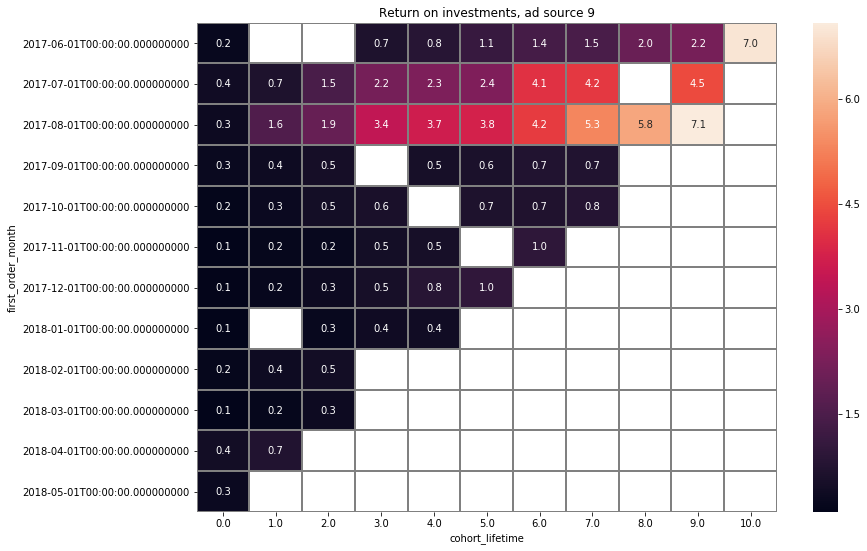

In [52]:
plt.figure(figsize=(13, 9))
plt.title('Return on investments, ad source 9')
sns.heatmap(unit_econ_per_source(9), annot=True, fmt='.1f', linewidths=1, linecolor='gray')

The 9th ad source showed remarkable results, it took only 1 and 2 month for the 3rd and 2nd cohorts to cover the expenses. 6 months for the 1st cohort. Though sometimes no customers came from this ad source it anyway was more profitable than the others. 

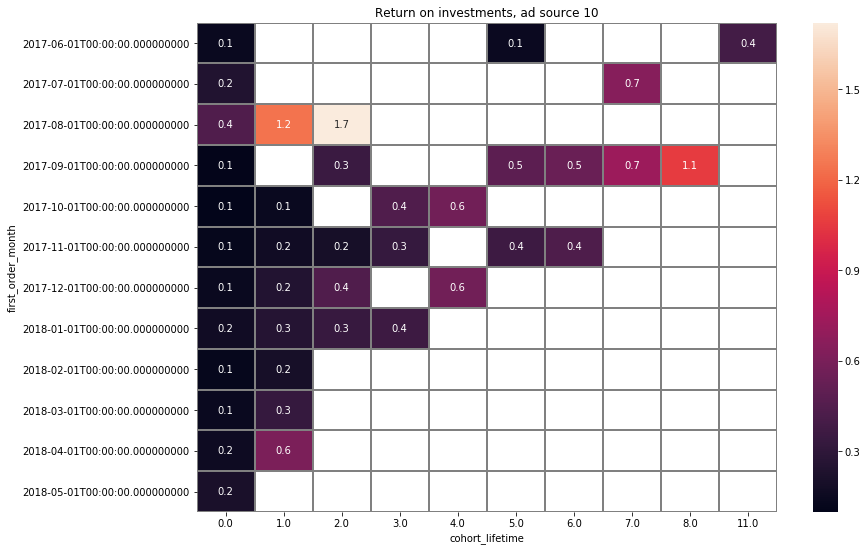

In [53]:
plt.figure(figsize=(13, 9))
plt.title('Return on investments, ad source 10')
sns.heatmap(unit_econ_per_source(10), annot=True, fmt='.1f', linewidths=1, linecolor='gray')

The 10th ad source apparently had the least traffic. But August and September cohorts covered the marketing expenses anyway, though it took different amount of time. The company should pay more attention and invest more resources in this ad source. 

<div class="alert alert-success" role="alert">
I deleted all the previous comments here, since it was a total mess.
<br>
Well, the least I can tell -- this is magnificent! =) It's not entirely what was needed, but I think this is even better and deeper analysis. I absolutely love it! And the numbers are correct too, hehe =)
</div>

### Conclusion

#### Ad source marketing investment optimization
The results of the step 1 have shown that Yandex.Afisha had three times more monthly potential customers among desktop users, around 15000 users compared to only 5000 of touch users. In 2017 the majority of potential customers (around 8000) came from the 4th ad source, but only 18% of the marketing budget was spent on this source. As mentioned before the company spent ~42% of its marketing budget on the 3rd source, but each month it attracted less users than the 4th source. The revenue of the 4th ad source was 34375.06$, which is 4000 more than that of the 3rd source. The revenue of 2nd and 5th sources is also not that different from that of the 3rd source, but they were invested much less money. Company should optimize its marketing expenditure by decreasing 3rd ad sources' investments and probably increasing 4th, 5th and 2nd sources investments. 

The 1st ad source is also worth mentioning, it attracted only 1000-4000 users monthly but brought ~28000 amount of revenue which is nearly the same as the 3rd source. However it only had 6% of total marketing investments which is 1/7 of the 3rd ad source. The 1st source should be receiving at least twice more investments.


#### ROI
The analysis has shown that the 3rd ad source was very unprofitable. The 9th and 10th ad sources on the contrary have demonstrated quite encouraging results. If company had spent more money on these sources, it would have probably made more revenue in the end. The 1st source is also quite encouraging. 

#### Platform choice
The results have shown that users prefer desktop version of the product which probably means that touch version has some technical problems. May be touch version of Yandex.Afisha should be improved.

#### Sales
Number of orders made by one cohort during a given period of time shows that customers of the cohorts were not as loyal as the company would like to expect. Number of orders dropped after first month and it is true for each cohorts, none of them have shown any growth. But the customers who stayed loyal acquired more products since the average number of orders per customer was increasing, especially for the first cohort. As for the revenue, each cohort has shown some success over the time but overall the revenue dropped by the end of the last lifetime. 

<div class="alert alert-success" role="alert">
All in all, I was very impressed by your thorough analysis, neat presentation style, and by your thought process in general. I think this is a very strong project. There are only a few of rather minor "red" notes, and the rest are "yellows", which basically mean an advice on how to improve your project and/or future work. After you fix it, I will gladly consider the project accepted. Good luck! =)
<br>
<br>
Cheers!
</div>

<div class="alert alert-success" role="alert">
Ok, to sum up the second iteration: you did a very good job! You adressed almost all of the issues, but there is a few that stil remains. Nothing serious though, shouldn't take you more than 20 minutes to fix, so don't give up! You've got this ;)
</div>

<div class="alert alert-success" role="alert">
Well, you're almost there --  only one little note remains. Keep it up! ;)
</div>

<div class="alert alert-success" role="alert">
<b>Gaini, I'm really sorry that I tortured you for that long -- but [6] is afterall the HARDEST sprint of the entire course (except the Final One, of course). It's not as straighforward as most other sprints and here one tiny mistake can snowball into abslutely ridiculous results.
<br>
And even despite that, you did much better than most students, so chin up! =))
<br>
<br>
I'm glad to say that I'm accepting this project and wish you the best of luck in your future studies! =)
</div>